In [131]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt


In [132]:
import pennylane as qml
from pennylane import numpy as np


def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

In [133]:
def add_k_sign(k, wires):
    
    #sign handling
    k = int(np.binary_repr(k,len(wires)),2)
    
    qml.QFT(wires=wires)
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])
    qml.adjoint(qml.QFT)(wires=wires)
    
def add_k_sign_inverse(k, wires):
    
    #sign handling
    k = int(np.binary_repr(k,len(wires)),2)
    
    qml.QFT(wires=wires)
    for j in range(len(wires)):
        new_j = len(wires)-1-j
        qml.RZ(-1* k * np.pi / (2**new_j), wires=wires[new_j])
    qml.adjoint(qml.QFT)(wires=wires)

In [134]:
def multiplication(wires_m, wires_k, wires_solution):
    # prepare sol-qubits to counting
    qml.QFT(wires=wires_solution)

    # add m to the counter
    for i in range(len(wires_k)):
        for j in range(len(wires_m)):
            coeff = 2 ** (len(wires_m) + len(wires_k) - i - j - 2)
            qml.ctrl(add_k_fourier, control=[wires_k[i], wires_m[j]])(coeff, wires_solution)

    # return to computational basis
    qml.adjoint(qml.QFT)(wires=wires_solution)
    
def multiplication_inverse(wires_m, wires_k, wires_solution):
    # prepare sol-qubits to counting
    qml.QFT(wires=wires_solution)

    # add m to the counter
    for i in range(len(wires_k)):
        for j in range(len(wires_m)):
            new_i = len(wires_k)-1-i
            new_j = len(wires_m)-1-j
            coeff = -1*2 ** (len(wires_m) + len(wires_k) - new_i - new_j - 2)
            qml.ctrl(add_k_fourier, control=[wires_k[new_i], wires_m[new_j]])(coeff, wires_solution)

    # return to computational basis
    qml.adjoint(qml.QFT)(wires=wires_solution)

In [135]:
wires_m = [0, 1, 2]           # qubits needed to encode m
wires_k = [3, 4, 5]           # qubits needed to encode k
wires_solution = [6, 7, 8, 9, 10,11,12,13]  # qubits needed to encode the solution

dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution+[14], shots=1000)

n_wires = len(dev.wires)


In [136]:
@qml.qnode(dev)
def circuit(m_k_a_t):
    m, k,a,t = m_k_a_t
    
    # # m and k codification
    # qml.BasisEmbedding(m, wires=wires_m)
    # qml.BasisEmbedding(k, wires=wires_k)
    
    for i in wires_m+wires_k:
        qml.Hadamard(wires=i)

    

    # Apply circuittiplication
    multiplication(wires_m, wires_k, wires_solution)
    add_k_sign(a,wires=wires_solution)
    add_k_sign(t,wires=wires_solution)
    
    
    # qml.PauliX(wires=6)
    qml.ControlledPhaseShift(-np.pi,wires=[6,0])
    qml.ControlledPhaseShift(-np.pi,wires=[6,1])
    qml.ControlledPhaseShift(-np.pi,wires=[6,2])
    qml.ControlledPhaseShift(-np.pi,wires=[6,3])
    qml.ControlledPhaseShift(-np.pi,wires=[6,4])
    qml.ControlledPhaseShift(-np.pi,wires=[6,5])
    # qml.ControlledPhaseShift(-np.pi/2,wires=[6,1])
    # qml.ControlledPhaseShift(-np.pi/4,wires=[6,2])
    # qml.ControlledPhaseShift(-np.pi/8,wires=[6,3])
    # qml.ControlledPhaseShift(-np.pi/10,wires=[6,4])
    # qml.PauliX(wires=6)
    
    add_k_sign_inverse(t,wires=wires_solution)
    add_k_sign_inverse(a,wires=wires_solution)
    # Apply circuittiplication
    multiplication_inverse(wires_m, wires_k, wires_solution)
    
    
    for i in wires_m+wires_k:
        qml.Hadamard(wires=i)
    
    
    # return qml.probs(wires=wires_solution)
    return qml.probs(wires=[0,1,2,3,4,5])
input = (2,3,2,1)

# res = circuit(input)

# print(res)

qml.draw_mpl(circuit, show_all_wires=True)(input)
plt.show()

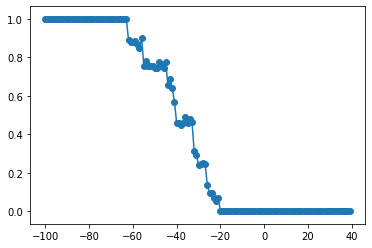

In [ ]:

x=[i for i in range(-100,40)]
y=[]
for i in x:
    # print('===')
    # print(circuit((2,3,2,i)))
    y.append(circuit((2,2,20,i))[0])

# plot scatter plot with x and y data
plt.scatter(x, y)
  
# plot with x and y data
plt.plot(x, y)

